<a href="https://colab.research.google.com/github/37khalil/SVM-Implementation/blob/main/Car_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# import itertools

# plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits import mplot3d
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
plotColor=plt.cm.Paired
observationSize=50

Comansant par un cas parfait pour le demantration de la separation lineaire

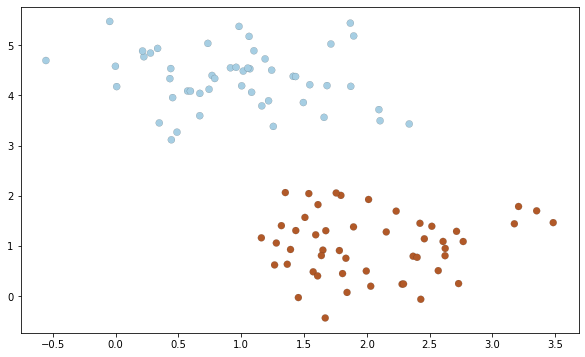

In [54]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)

plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=observationSize, cmap=plotColor, linewidth=.1, edgecolors='black')

In [52]:
def plot_svc_decision_function(model, X, y, ax=None, plot_support=True):
    plt.figure(figsize=(10,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=observationSize, cmap=plotColor, linewidth=.1, edgecolors='black')
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1])
    y = np.linspace(ylim[0], ylim[1])
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=observationSize * 3, linewidth=1, c='none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

def train_linear_SVM(X, y, c=1E6):
    model = SVC(kernel='linear', C=c, verbose=True)
    model.fit(X, y)
    
    return model

[LibSVM][[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [1.35139348 2.06383637]]


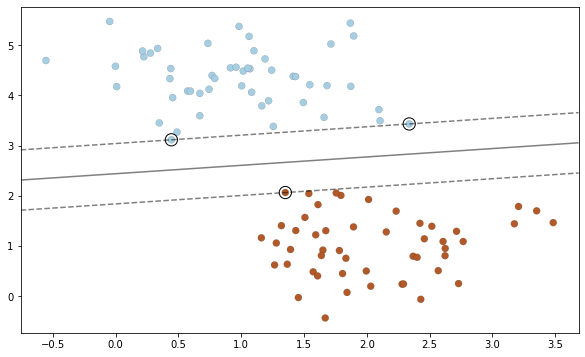

In [55]:
linear_model = train_linear_SVM(X, y)
plot_svc_decision_function(linear_model, X, y)
print(linear_model.support_vectors_)

[LibSVM][[1.35139348 2.2       ]
 [1.35139348 2.06383637]]


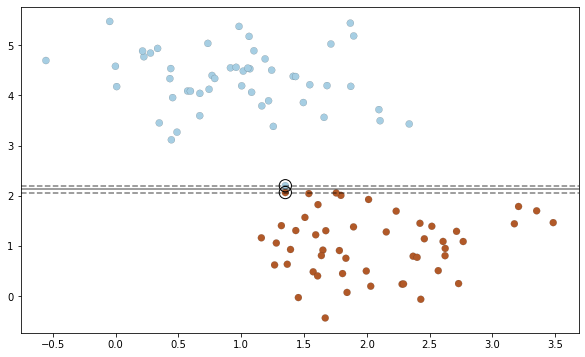

In [56]:
X = np.append(X, [[1.35139348, 2.2]], axis=0)
y = np.append(y, 0)

linear_model = train_linear_SVM(X, y)
plot_svc_decision_function(linear_model, X, y)
print(linear_model.support_vectors_)

[LibSVM]

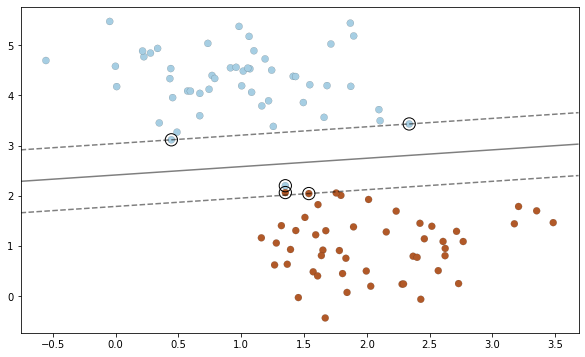

In [57]:
linear_model = train_linear_SVM(X, y, c=5)
plot_svc_decision_function(linear_model, X, y)

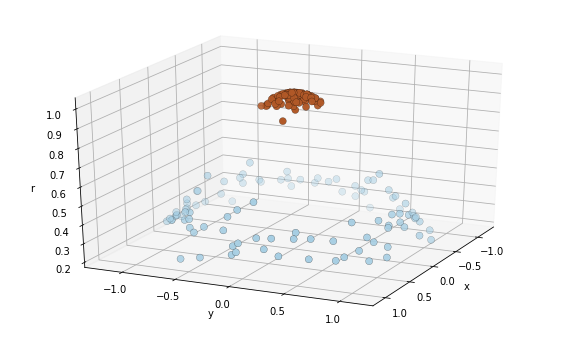

In [58]:
X, y = make_circles(200, factor=.1, noise=.1)

# la fonction du noyaux RBF
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=25, azim=25, X=X, y=y):
    plt.figure(figsize=(10,6))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=observationSize, cmap=plotColor, linewidth=.2,edgecolors='black')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()

[LibSVM]

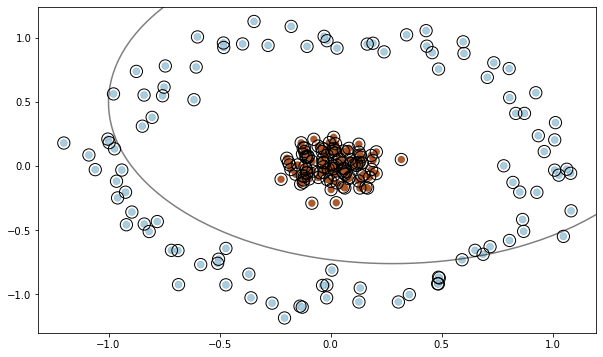

In [59]:
#Under-fitted
clf = SVC(C=1, kernel='rbf', gamma=0.01, verbose=True).fit(X, y)
plot_svc_decision_function(clf, X, y)

[LibSVM]

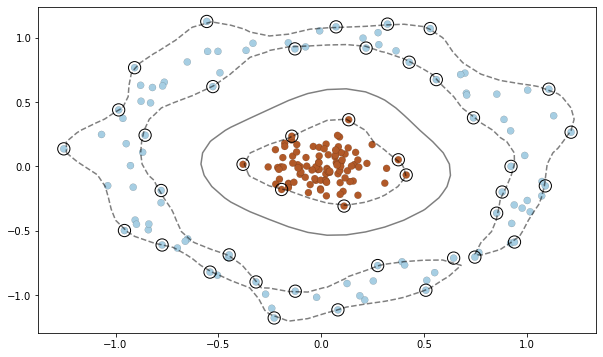

In [10]:
#Over-fitted
clf = SVC(C=1E7, kernel='rbf', gamma=10, verbose=True).fit(X, y)

plot_svc_decision_function(clf, X, y)

[LibSVM]

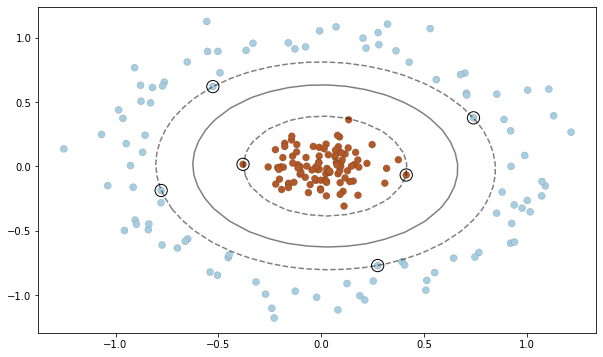

In [11]:
#good model
clf = SVC(kernel='rbf', C=1E6, gamma=0.1, verbose=True)
clf.fit(X, y)

plot_svc_decision_function(clf, X, y)

#Iris Dataset

In [34]:
iris = sns.load_dataset("iris")

iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


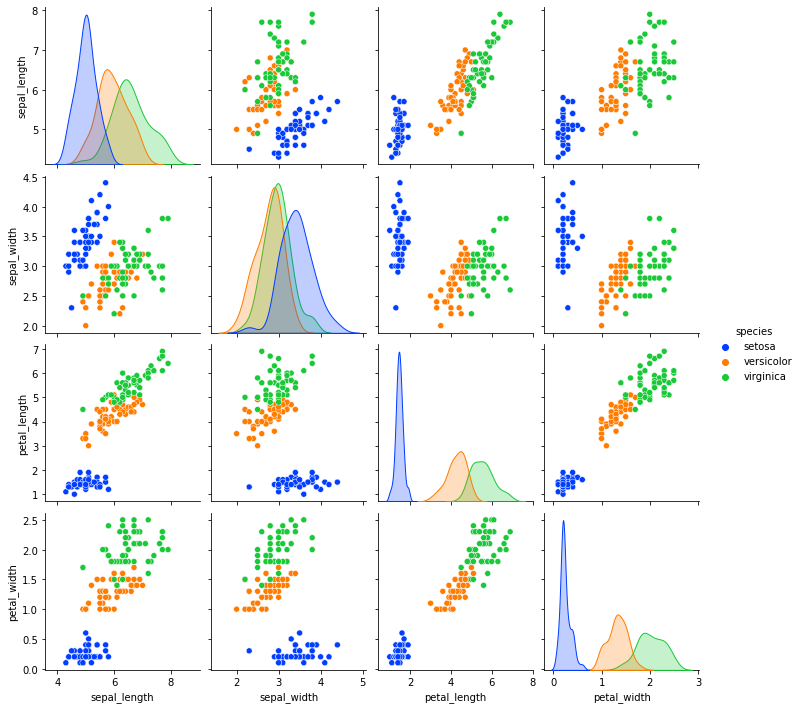

In [13]:
sns.pairplot(iris, hue="species",palette="bright")

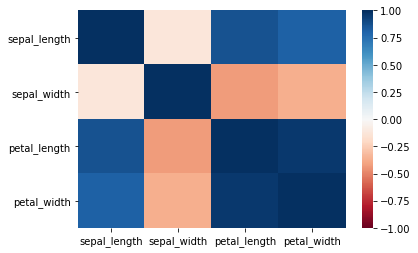

In [14]:
sns.heatmap(iris.corr(), vmin=-1, vmax=1, cmap="RdBu")

In [61]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Separating out the features
X = iris.loc[:, features].values

# Separating out the target
y = LabelEncoder().fit_transform(iris.loc[:,['species']].values)

# Standardizing the features
X = StandardScaler().fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
pca_model = PCA(n_components=2)

principalComponents = pca_model.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['V1', 'V2'])
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)

pca_model.explained_variance_ratio_

array([0.72962445, 0.22850762])

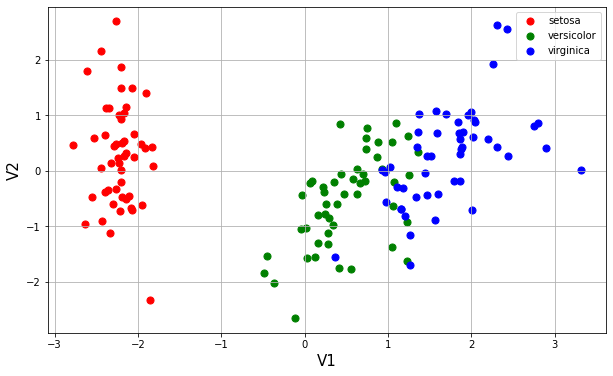

In [63]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('V1', fontsize = 15)
ax.set_ylabel('V2', fontsize = 15)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'V1']
               , finalDf.loc[indicesToKeep, 'V2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

[LibSVM]

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


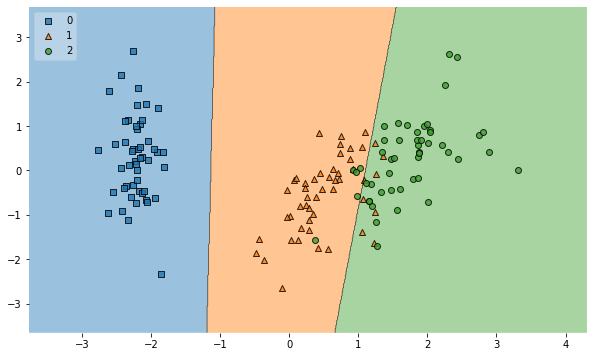

In [85]:
clf = SVC(kernel='linear', C=1E6, gamma=0.01, verbose=True)
clf.fit(principalComponents, y)

fig = plt.figure(figsize = (10,6))
fig = plot_decision_regions(X=principalComponents, y=y,clf=clf, legend=2)
plt.show()